# Assessment 1: Group 6


**Group Members:**

> Abrigo, Nathanael\
> Buhay, Kyle Andrei\
> Cruz, Kristel Lenci\
> Entrata, Joshua Kyle


In [65]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import pycountry
import pycountry_convert as pc
import plotly.express as px

In [66]:
# This can help us see all the columns when checking the dataframe
pd.set_option('display.max_columns', None)

## `Part 1: Data Wrangling`


### **Data Cleaning**


#### Loading Datasets


In [67]:
# Load FAO dataset
df_fao = pd.read_csv('FAO.csv', encoding='iso-8859-1')

# Load FAOSTAT dataset
df_faostat = pd.read_csv('FAOSTAT.csv')

In [68]:
df_fao.sample(3)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
3653,TCD,39,Chad,2543,"Sweeteners, Other",5142,Food,1000 tonnes,15.45,18.73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1
10017,JAM,109,Jamaica,2657,"Beverages, Fermented",5142,Food,1000 tonnes,18.11,-77.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
8036,GRD,86,Grenada,2907,Starchy Roots,5521,Feed,1000 tonnes,12.26,-61.60,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1


In [69]:
df_faostat.sample(3)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
92,OA,Annual population,94,Holy See,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,0.792,X,International reliable sources,"UNDESA, Population Division – World Population..."
111,OA,Annual population,113,Kyrgyzstan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,6045.117,X,International reliable sources,"UNDESA, Population Division – World Population..."
16,OA,Annual population,16,Bangladesh,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,164669.751,X,International reliable sources,"UNDESA, Population Division – World Population..."


#### Data Dictionary


In [70]:
def generate_data_dictionary(df, desc_list):
    data_dict = {
        'Column Name': [],
        'Data Type': [],
        'Description': []
    }
    
    for i, column in enumerate(df.columns):
        data_dict['Column Name'].append(column)
        data_dict['Data Type'].append(df[column].dtype)
        
        # Provide a description based on the description list or a default value
        description = desc_list[i] if i < len(desc_list) else 'N/A'
        
        # If the column name starts with 'Y' and is a year, format accordingly
        if column.startswith('Y') and column[1:].isdigit():
            description = f'Data for the year {column[1:]}.'
        data_dict['Description'].append(description)
    
    return pd.DataFrame(data_dict)

`FAO Dataset`


In [71]:
fao_description_list = [
    'Abbreviation of Area',
    'Full name of the country or region',
    'ISO country code or region abbreviation',
    'Numeric code for the country or region',
    'Numeric code for the item',
    'Name of the food item or product',
    'Numeric code for the element',
    'Type of data recorded',
    'Measurement unit for the recorded data',
    'Latitude coordinate of the location',
    'Longitude coordinate of the location',
]

In [72]:
# Generate data dictionary for FAO
fao_data_dict = generate_data_dictionary(df_fao, fao_description_list)
fao_data_dict

,Column Name,Data Type,Description
0,Area Abbreviation,object,Abbreviation of Area
1,Area Code,int64,Full name of the country or region
2,Area,object,ISO country code or region abbreviation
3,Item Code,int64,Numeric code for the country or region
4,Item,object,Numeric code for the item
...,...,...,...
58,Y2009,float64,Data for the year 2009.
59,Y2010,float64,Data for the year 2010.
60,Y2011,float64,Data for the year 2011.
61,Y2012,int64,Data for the year 2012.


`FAOSTAT Dataset`


In [73]:
faostat_description_list=[
    "Numeric Code for Domain",
    "Population Type",
    "Numeric code for the country or region",
    "Full name of the country or region",
    "Numeric code for the element",
    "Element Type",
    "Numeric code for the item",
    "Object of focus",
    "Code for the Year",
    "Time of the Year",
    "Quantity of item",
    "Value of the item",
    "Flag",
    "Sources of item",
    "Note for item",
]

In [74]:
# Generate data dictionary for FAOSTAT
faostat_data_dict = generate_data_dictionary(df_faostat, faostat_description_list)
faostat_data_dict

,Column Name,Data Type,Description
0,Domain Code,object,Numeric Code for Domain
1,Domain,object,Population Type
2,Area Code,int64,Numeric code for the country or region
3,Area,object,Full name of the country or region
4,Element Code,int64,Numeric code for the element
5,Element,object,Element Type
6,Item Code,int64,Numeric code for the item
7,Item,object,Object of focus
8,Year Code,int64,Code for the Year
9,Year,int64,Time of the Year


#### Handling Missing Values


In [75]:
# Check rows with null value per column
fao_null_values = {col: df_fao[col].isnull().sum() for col in df_fao.columns if df_fao[col].isnull().sum() > 0}

fao_null_values

{'Y1961': 3539,
 'Y1962': 3539,
 'Y1963': 3539,
 'Y1964': 3539,
 'Y1965': 3539,
 'Y1966': 3539,
 'Y1967': 3539,
 'Y1968': 3539,
 'Y1969': 3539,
 'Y1970': 3539,
 'Y1971': 3539,
 'Y1972': 3539,
 'Y1973': 3539,
 'Y1974': 3539,
 'Y1975': 3539,
 'Y1976': 3539,
 'Y1977': 3539,
 'Y1978': 3539,
 'Y1979': 3539,
 'Y1980': 3539,
 'Y1981': 3539,
 'Y1982': 3539,
 'Y1983': 3539,
 'Y1984': 3539,
 'Y1985': 3539,
 'Y1986': 3539,
 'Y1987': 3539,
 'Y1988': 3539,
 'Y1989': 3539,
 'Y1990': 3415,
 'Y1991': 3415,
 'Y1992': 987,
 'Y1993': 612,
 'Y1994': 612,
 'Y1995': 612,
 'Y1996': 612,
 'Y1997': 612,
 'Y1998': 612,
 'Y1999': 612,
 'Y2000': 349,
 'Y2001': 349,
 'Y2002': 349,
 'Y2003': 349,
 'Y2004': 349,
 'Y2005': 349,
 'Y2006': 104,
 'Y2007': 104,
 'Y2008': 104,
 'Y2009': 104,
 'Y2010': 104,
 'Y2011': 104}

In [76]:
null_cols = df_fao.isnull().sum()
null_cols[null_cols > 0].index

Index(['Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968',
       'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976',
       'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984',
       'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992',
       'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000',
       'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008',
       'Y2009', 'Y2010', 'Y2011'],
      dtype='object')

In [77]:
print(f'Number of rows with null values: {len(df_fao[df_fao.isnull().any(axis=1)])}')

Number of rows with null values: 3539


In [78]:
faostat_null_values = {col: df_faostat[col].isnull().sum() for col in df_faostat.columns if df_faostat[col].isnull().sum() > 0}

faostat_null_values

{}

**Explanation & Justification:**

> We handled missing data in the `FAO` and `FAOSTAT` dataset specifically for the years 1961 - 1991 by retaining the null values rather than replacing them with -1. Since the "y{YEAR_NUM}" columns are the only ones with null values, it is acceptable to leave these nulls as they are. Replacing these nulls with -1 could affect the summarization of statistics and affect the accuracy of visualizations.

> Retaining null values preserves the integrity of our statistical summaries, such as mean and standard deviation calculations, which could be skewed by arbitrary replacement values like -1. By keeping nulls, we avoid misrepresenting missing data as zeroes, thus ensuring that our plots and analyses accurately reflect the data's true nature and maintain clarity in our visualizationons.


#### Removing & Checking Duplicates


In [79]:
# Check duplicates in FAO
dupe_fao_sum= df_fao.duplicated().sum()

print(f'Total number of duplicated rows in FAO: {dupe_fao_sum}')

Total number of duplicated rows in FAO: 0


In [80]:
# Check duplicates in FAOSTAT
dupe_faostat_sum = df_faostat.duplicated().sum()

print(f'Total number of duplicated rows in FAOSTAT: {dupe_faostat_sum}')

Total number of duplicated rows in FAOSTAT: 0


**Explanation & Justification:**

> To remove and check duplicates in both the `FAO` and `FAOSTAT` datasets, the _duplicated_ Pandas method is utilized.

> By default, the _duplicated_ Pandas method returns a boolean series that denotes duplicate rows. To have a numerical representation of the number of duplicates, we added the _sum_ Pandas method, that denotes its total instead.


#### Standardize Column Names


In [81]:
df_fao.columns = (
    df_fao.columns
    .str.lower()                                 # Convert to lowercase
    .str.replace(' ', '_')                       # Replace spaces with underscores
    .str.replace(r'[^a-z0-9_]', '', regex=True)  # Remove special characters
)

In [82]:
df_faostat.columns = (
    df_faostat.columns
    .str.lower()                
    .str.replace(' ', '_')      
    .str.replace(r'[^a-z0-9_]', '', regex=True)  
)

**Explanation & Justification:**

> To standardize the column names of the `FAO` and `FAOSTAT` datasets, we first converted the column names to lowercase and replaced any spaces with underscores. This ensures consistency in case and format, helping to avoid potential issues related to case sensitivity.

> Additionally, we removed any special characters from the column names, leaving only lowercase letters, numbers, and underscores.

> These standardization steps enhance data consistency, making the datasets easier to work with and reducing the likelihood of errors during data processing.


In [83]:
# Rename similar columns in the dataframe
df_faostat.rename(columns={
    'item'        : 'population_item',
    'item_code'   : 'population_item_code',
    'element'     : 'population_element',
    'element_code': 'population_element_code',
    'unit'        : 'population_unit'
}, inplace=True)

df_faostat.columns

Index(['domain_code', 'domain', 'area_code', 'area', 'population_element_code',
       'population_element', 'population_item_code', 'population_item',
       'year_code', 'year', 'population_unit', 'value', 'flag',
       'flag_description', 'note'],
      dtype='object')

**Explanation & Justification:**

> The `FAO` and `FAOSTAT` datasets share similar column names and merging them could lead to confusion or errors. Thus, we renamed such columns to ensure clarity and avoid potential conflicts during analysis.

> We renamed specific columns in the `FAOSTAT` dataset to make them more descriptive and aligned with the dataset's focus on population data. The columns renamed include:
>
> - 'item' to 'population_item': This clarifies that the column refers specifically to the population data item (e.g., "Population - Estimated and Projected").
> - 'item_code' to 'population_item_code': By adding "population," it specifies that the code is related to population items.
> - 'element' to 'population_element': This indicates that the column pertains to a specific element within the population data (e.g., "Total Population - Both sexes").
> - 'element_code' to 'population_element_code': This specifies that the code relates to population elements (e.g., "511").
> - 'unit' to 'population_unit': This clearly shows that the column represents the unit of measurement for the population data (e.g., "1000 persons").


### **Data Merging**


In [84]:
df_fao.merge(
    df_faostat, 
    how='inner', 
    on=['area_code', 'area']
).sample(3)

,area_abbreviation,area_code,area,item_code,item,element_code,element,unit,latitude,longitude,y1961,y1962,y1963,y1964,y1965,y1966,y1967,y1968,y1969,y1970,y1971,y1972,y1973,y1974,y1975,y1976,y1977,y1978,y1979,y1980,y1981,y1982,y1983,y1984,y1985,y1986,y1987,y1988,y1989,y1990,y1991,y1992,y1993,y1994,y1995,y1996,y1997,y1998,y1999,y2000,y2001,y2002,y2003,y2004,y2005,y2006,y2007,y2008,y2009,y2010,y2011,y2012,y2013,domain_code,domain,population_element_code,population_element,population_item_code,population_item,year_code,year,population_unit,value,flag,flag_description,note
5571,DNK,54,Denmark,2558,Rape and Mustardseed,5521,Feed,1000 tonnes,56.26,9.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,110.0,40.0,100.0,50.0,140.0,100.0,90.0,46.0,40.0,67.0,30.0,89.0,70.0,60.0,63.0,55.0,175.0,296.0,50.0,180.0,180.0,280.0,200.0,248.0,7.0,107,142,OA,Annual population,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,5733.551,X,International reliable sources,"UNDESA, Population Division – World Population..."
20302,URY,234,Uruguay,2532,Cassava and products,5142,Food,1000 tonnes,-32.52,-55.77,2.0,2.0,2.0,3.0,1.0,3.0,0.0,2.0,2.0,2.0,0.0,0.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,OA,Annual population,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,3456.750,X,International reliable sources,"UNDESA, Population Division – World Population..."
3664,TCD,39,Chad,2572,Groundnut Oil,5142,Food,1000 tonnes,15.45,18.73,10.0,10.0,10.0,9.0,11.0,9.0,9.0,9.0,9.0,9.0,8.0,6.0,7.0,7.0,7.0,6.0,7.0,7.0,7.0,8.0,7.0,6.0,7.0,6.0,9.0,8.0,7.0,5.0,10.0,10.0,16.0,17.0,17.0,15.0,24.0,23.0,28.0,28.0,33.0,19.0,28.0,28.0,28.0,28.0,31.0,32.0,29.0,32.0,32.0,35.0,36.0,33,33,OA,Annual population,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,14899.994,X,International reliable sources,"UNDESA, Population Division – World Population..."


In [85]:
len_merged_df = len(
    df_fao.merge(
        df_faostat, 
        how='inner', 
        on=['area_code', 'area']
    )
)

print(f'Number of rows of FAO dataframe: {len(df_fao)}')
print(f'Number of rows of FAOSTAT dataframe: {len(df_faostat)}')
print(f'Number of rows of merged dataframe: {len_merged_df}')

Number of rows of FAO dataframe: 21477
Number of rows of FAOSTAT dataframe: 231
Number of rows of merged dataframe: 21230


**Explanation & Justification:**

> We merged the two dataframes on both 'area_code' and 'area' not only because these columns are present in both datasets, but also provide a more unique identifier for each row in the merged result.

> We chose an _inner join_ for this merge to avoid introducing null values, since there are combinations of 'area_code' and 'area' that do not exist in the `FAO` and `FAOSTAT` dataframes.

> An inner join allows us to retain only the rows where there is a match in both datasets based on the specified columns. This is crucial for ensuring data consistency and accuracy, as it filters out any records that do not have corresponding matches in both dataframes.

> Unlike other types of joins, such as left or right joins, which would include unmatched records from one side or the other, resulting in null values, the inner join provides a focused dataset with only the relevant records that exist in both sources. This approach not only enhances the accuracy of the match but also improves the uniqueness and reliability of each row in the final merged dataset.


#### Create New Dataframe


In [86]:
merged_df = df_fao.merge(
    df_faostat, 
    how='inner', 
    on=['area_code', 'area'])

merged_df.sample(3)

,area_abbreviation,area_code,area,item_code,item,element_code,element,unit,latitude,longitude,y1961,y1962,y1963,y1964,y1965,y1966,y1967,y1968,y1969,y1970,y1971,y1972,y1973,y1974,y1975,y1976,y1977,y1978,y1979,y1980,y1981,y1982,y1983,y1984,y1985,y1986,y1987,y1988,y1989,y1990,y1991,y1992,y1993,y1994,y1995,y1996,y1997,y1998,y1999,y2000,y2001,y2002,y2003,y2004,y2005,y2006,y2007,y2008,y2009,y2010,y2011,y2012,y2013,domain_code,domain,population_element_code,population_element,population_item_code,population_item,year_code,year,population_unit,value,flag,flag_description,note
5093,CUB,49,Cuba,2613,Grapefruit and products,5142,Food,1000 tonnes,21.52,-77.78,6.0,6.0,12.0,10.0,9.0,11.0,11.0,12.0,14.0,14.0,10.0,16.0,20.0,22.0,20.0,21.0,8.0,10.0,11.0,20.0,33.0,5.0,23.0,17.0,44.0,34.0,35.0,70.0,44.0,121.0,101.0,167.0,186.0,180.0,215.0,296.0,242.0,278.0,102.0,147.0,126.0,69.0,132.0,109.0,82.0,127.0,107.0,114.0,59.0,82.0,64.0,41,33,OA,Annual population,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,11484.636,X,International reliable sources,"UNDESA, Population Division – World Population..."
4753,CRI,48,Costa Rica,2765,Crustaceans,5142,Food,1000 tonnes,9.75,-83.75,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,1.0,2.0,4.0,5.0,3.0,3.0,4.0,4.0,2.0,2.0,4.0,2.0,4.0,1.0,0.0,0.0,2.0,2.0,2.0,3.0,6.0,6.0,7.0,8.0,8.0,8.0,6.0,5.0,5.0,5,4,OA,Annual population,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,4905.769,X,International reliable sources,"UNDESA, Population Division – World Population..."
5468,KOR,116,Democratic People's Republic of Korea,2575,Cottonseed Oil,5142,Food,1000 tonnes,40.34,127.51,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,4,4,OA,Annual population,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,25490.965,X,International reliable sources,"UNDESA, Population Division – World Population..."


**Explanation & Justification:**

> We merged the `FAO` and `FAOSTAT` datasets into a single dataframe, `merged_df,` using an inner join based on the common columns area_code and area.

> This operation ensures that only the rows with matching 'area_code' and 'area' values from both datasets are included in the final merged dataframe.


### **Feature Engineering**


##### Column: Years Existing


In [88]:
# Create a list for year columns that will be useful throughout the analysis
year_cols = [col for col in merged_df.columns if col.startswith('y') and col[1:].isdigit()]

In [89]:
# Create a new column by adding the number of year columns that do not have a null value
merged_df['years_existing'] = merged_df[year_cols].notnull().sum(axis=1)

merged_df[['area_code', 'area', 'years_existing']].sample(3)

,area_code,area,years_existing
19046,220,Trinidad and Tobago,53
2118,17,Bermuda,53
17617,25,Solomon Islands,53


**Explanation & Justification:**

> We created a new column for _years existing_ to count the number of years for which valid (non-negative) data exists per record in the dataset.


##### Column: Average Production


In [91]:
# Create a new column by getting the mean of year columns' values
merged_df['average_production'] = merged_df[year_cols].mean(axis=1)

merged_df[['area', 'years_existing', 'average_production']].sample(3)

,area,years_existing,average_production
5311,Czechia,21,45.523810
8772,Hungary,53,4334.339623
18687,Tajikistan,22,146.500000


**Explanation & Justification:**

> We created a new column for _average production_ to calculate the mean production over a specified range of years within the dataset. It summarizes production levels over time per record.


##### Column: Value per Capita


In [92]:
# Convert the value of the population unit to digits only (e.g 1000 persons to 1000)
merged_df['population_unit'] = merged_df['population_unit'].str.extract('(\d+)').astype(int)

merged_df['population_unit'].unique()

array([1000])

In [93]:
merged_df[['population_unit', 'value']].sample(3)

,population_unit,value
7920,1000,11159.773
6825,1000,5523.231
12151,1000,436.330


In [94]:
# Create a new column by dividing the value by the population unit
merged_df['value_per_capita'] = merged_df['value'] / merged_df['population_unit']

merged_df[['value', 'population_unit', 'value_per_capita']].sample(3)

,value,population_unit,value_per_capita
17759,56717.156,1000,56.717156
6531,1309.632,1000,1.309632
17058,15850.567,1000,15.850567


**Explanation & Justification:**

> We created a new column for _value per capita_ by dividing the 'value' by the 'population_unit.'


#### Column: ISO Alpha-3 Country Code


In [96]:
# Create a function to get the iso_alpha_3 of a country using the PyCountry library

def get_iso_alpha3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except:
        return 'INVALID'
    
merged_df['iso_alpha3'] = merged_df['area'].apply(get_iso_alpha3)
merged_df[['area', 'iso_alpha3']].drop_duplicates().sample(3)

,area,iso_alpha3
11630,Luxembourg,LUX
679,Armenia,ARM
4407,Colombia,COL


In [97]:
# Check if there are areas that has 'INVALID' iso_alpha3
merged_df[merged_df['iso_alpha3'] == 'INVALID'][['area', 'iso_alpha3']].drop_duplicates()

,area,iso_alpha3
2162,Bolivia (Plurinational State of),INVALID
3866,"China, Hong Kong SAR",INVALID
3999,"China, Macao SAR",INVALID
4120,"China, mainland",INVALID
4266,"China, Taiwan Province of",INVALID
9293,Iran (Islamic Republic of),INVALID
15658,Republic of Korea,INVALID
19275,Turkey,INVALID
20631,Venezuela (Bolivarian Republic of),INVALID


In [98]:
# Manually set the ISO alpha-3 of these countries 
manual_iso_mapping = {
    'Bolivia (Plurinational State of)': 'BOL',
    'China, Hong Kong SAR': 'HKG',
    'China, Macao SAR': 'MAC',
    'China, mainland': 'CHN',
    'China, Taiwan Province of': 'TWN',
    'Iran (Islamic Republic of)': 'IRN',
    'Republic of Korea': 'KOR',
    'Turkey': 'TUR',
    'Venezuela (Bolivarian Republic of)': 'VEN',
}

merged_df['iso_alpha3'] = merged_df['area'].map(manual_iso_mapping).fillna(merged_df['iso_alpha3'])

merged_df[merged_df['iso_alpha3'] == 'INVALID'][['area', 'iso_alpha3']].drop_duplicates()

,area,iso_alpha3


In [99]:
merged_df[['area', 'iso_alpha3']].drop_duplicates().sample(3)

,area,iso_alpha3
17316,Slovakia,SVK
18457,Switzerland,CHE
5780,Dominica,DMA


**Explanation & Justification:**

> We created a new column for _iso_alpha3_ using `pycountry_convert` library to assign continent for each country.

> In the case of some areas (like Timor-Leste), we manually assigned its continent. This column will be useful for future analysis based on continents.


#### Column: Continent


In [100]:
def country_to_continent(country_alpha3):
    try:
        country_alpha2 = pc.country_alpha3_to_country_alpha2(country_alpha3)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    except:
        return 'Invalid'
    
    return country_continent_name

merged_df['continent'] = merged_df['iso_alpha3'].apply(country_to_continent)
merged_df[['area', 'iso_alpha3', 'continent']].drop_duplicates().sample(3)

,area,iso_alpha3,continent
12968,Montenegro,MNE,Europe
13329,Myanmar,MMR,Asia
19754,United Arab Emirates,ARE,Asia


In [101]:
# Check if there are continents that has 'INVALID' value
merged_df[merged_df['continent'] == 'Invalid'][['area', 'iso_alpha3', 'continent']].drop_duplicates()

,area,iso_alpha3,continent
18831,Timor-Leste,TLS,Invalid


In [102]:
# Manually assign continent for Timor-Leste
merged_df.loc[merged_df['iso_alpha3'] == 'TLS', 'continent'] = 'Asia'

merged_df[merged_df['continent'] == 'Invalid'][['area', 'iso_alpha3', 'continent']].drop_duplicates()

,area,iso_alpha3,continent


**Explanation & Justification:**

> We created a new column for _continent_ using `pycountry` library to assign ISO alpha-3 for each country.

> In the case of some areas that were not recognized by the library, we manually assigned their respective ISO alpha-3 based on our research for those countries.

> This column will be essential when creating a choropleth maps.


### **Final Merged Dataframe**


In [103]:
merged_df.sample(3)

,area_abbreviation,area_code,area,item_code,item,element_code,element,unit,latitude,longitude,y1961,y1962,y1963,y1964,y1965,y1966,y1967,y1968,y1969,y1970,y1971,y1972,y1973,y1974,y1975,y1976,y1977,y1978,y1979,y1980,y1981,y1982,y1983,y1984,y1985,y1986,y1987,y1988,y1989,y1990,y1991,y1992,y1993,y1994,y1995,y1996,y1997,y1998,y1999,y2000,y2001,y2002,y2003,y2004,y2005,y2006,y2007,y2008,y2009,y2010,y2011,y2012,y2013,domain_code,domain,population_element_code,population_element,population_item_code,population_item,year_code,year,population_unit,value,flag,flag_description,note,years_existing,average_production,value_per_capita,iso_alpha3,continent
466,ATG,8,Antigua and Barbuda,2560,Coconuts - Incl Copra,5142,Food,1000 tonnes,17.06,-61.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,OA,Annual population,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000,102.012,X,International reliable sources,"UNDESA, Population Division – World Population...",53,0.000000,0.102012,ATG,North America
21066,ZMB,251,Zambia,2743,Cream,5142,Food,1000 tonnes,-13.13,27.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,OA,Annual population,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000,17094.130,X,International reliable sources,"UNDESA, Population Division – World Population...",53,0.000000,17.094130,ZMB,Africa
14056,NZL,156,New Zealand,2769,"Aquatic Animals, Others",5142,Food,1000 tonnes,-40.90,174.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1,1,OA,Annual population,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000,4705.818,X,International reliable sources,"UNDESA, Population Division – World Population...",53,0.358491,4.705818,NZL,Oceania


In [106]:
# Check if there are rows with null values (excluding the year columns)
non_year_columns = merged_df.columns.difference(year_cols)
merged_df[merged_df[non_year_columns].isnull().any(axis=1)].head()

,area_abbreviation,area_code,area,item_code,item,element_code,element,unit,latitude,longitude,y1961,y1962,y1963,y1964,y1965,y1966,y1967,y1968,y1969,y1970,y1971,y1972,y1973,y1974,y1975,y1976,y1977,y1978,y1979,y1980,y1981,y1982,y1983,y1984,y1985,y1986,y1987,y1988,y1989,y1990,y1991,y1992,y1993,y1994,y1995,y1996,y1997,y1998,y1999,y2000,y2001,y2002,y2003,y2004,y2005,y2006,y2007,y2008,y2009,y2010,y2011,y2012,y2013,domain_code,domain,population_element_code,population_element,population_item_code,population_item,year_code,year,population_unit,value,flag,flag_description,note,years_existing,average_production,value_per_capita,iso_alpha3,continent


**Explanation & Justification:**

> We created a new column for _value per capita_ by dividing the `value` by the `population_unit`.


## `Part 2: Data Exploration`


### **Descriptive Statistics**


#### Summarize Statistics


In [107]:
# Generate summary statistics 
merged_df.describe()

,area_code,item_code,element_code,latitude,longitude,y1961,y1962,y1963,y1964,y1965,y1966,y1967,y1968,y1969,y1970,y1971,y1972,y1973,y1974,y1975,y1976,y1977,y1978,y1979,y1980,y1981,y1982,y1983,y1984,y1985,y1986,y1987,y1988,y1989,y1990,y1991,y1992,y1993,y1994,y1995,y1996,y1997,y1998,y1999,y2000,y2001,y2002,y2003,y2004,y2005,y2006,y2007,y2008,y2009,y2010,y2011,y2012,y2013,population_element_code,population_item_code,year_code,year,population_unit,value,years_existing,average_production,value_per_capita
count,21230.000000,21230.000000,21230.000000,21230.000000,21230.000000,17821.000000,17821.000000,17821.000000,17821.000000,17821.000000,17821.000000,17821.000000,17821.000000,17821.000000,17821.000000,17821.000000,17821.000000,17821.000000,17821.000000,17821.000000,17821.000000,17821.000000,17821.000000,17821.000000,17821.000000,17821.000000,17821.000000,17821.000000,17821.000000,17821.000000,17821.000000,17821.000000,17821.000000,17821.000000,17945.000000,17945.000000,20243.000000,20618.000000,20618.000000,20618.000000,20618.000000,20618.000000,20618.000000,20618.000000,20881.000000,20881.000000,20881.000000,20881.000000,20881.000000,20881.000000,21126.000000,21126.000000,21126.000000,21126.000000,21126.000000,21126.000000,21230.000000,21230.000000,21230.0,21230.0,21230.0,21230.0,21230.0,2.123000e+04,21230.000000,21230.000000,21230.000000
mean,124.814131,2694.205417,5211.712435,20.579903,15.671588,196.523371,202.079457,206.793165,211.283093,218.963638,227.450143,231.907974,239.955558,245.918411,251.876999,255.877448,259.114472,269.046743,268.845856,276.210201,278.353123,287.805903,301.722238,307.806184,307.633971,313.666068,323.052130,329.020818,341.744571,346.561192,354.008698,364.273217,366.315863,374.742888,377.813597,381.872778,390.502001,393.778155,401.615918,409.116452,420.024202,426.457561,433.783781,446.725337,456.871462,463.916335,470.729802,478.052584,492.195393,498.739476,501.887721,514.176607,528.699707,530.447742,541.490580,559.606314,566.831842,581.982902,511.0,3010.0,2017.0,2017.0,1000.0,4.632955e+04,47.657560,362.657852,46.329553
std,72.990946,148.967495,146.840747,24.468235,66.383070,1870.168606,1890.372852,1867.202094,1868.027017,2021.463034,2107.033984,2139.153529,2196.258871,2274.310498,2330.495241,2380.316696,2429.815117,2536.238200,2373.068810,2472.356728,2435.229420,2563.522935,2766.407859,2777.340188,2739.274194,2783.246139,2940.704394,3012.658473,3111.679580,3104.261436,3241.950040,3322.828205,3247.219904,3360.450346,3433.835535,3465.032952,3530.395137,3576.645581,3736.272199,3776.461092,3985.809971,4059.960741,4173.589678,4366.204759,4676.758554,4779.374612,4897.092297,4939.928143,5031.018696,5129.870824,5164.488579,5329.561904,5528.467173,5577.997083,5754.164776,5917.080124,6082.749665,6254.160235,0.0,0.0,0.0,0.0,0.0,1.612993e+05,12.387084,3242.173480,161.299283
min,1.000000,2511.000000,5142.000000,-40.900000,-172.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-169.000000,-246.000000,511.0,3010.0,2017.0,2017.0,1000.0,5.534500e+01,2.000000,0.000000,0.055345
25%,63.000000,2561.000000,5142.000000,6.430000,-14.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,511.0,3010.0,

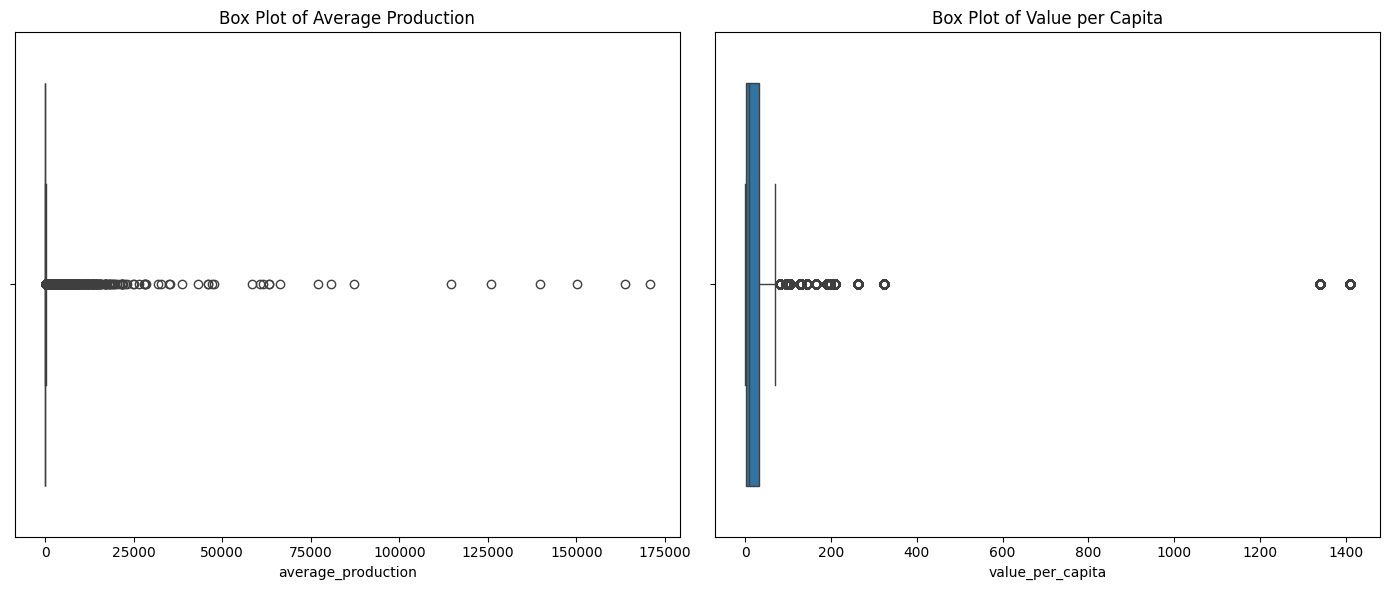

In [109]:
# Plot to check the outliers in the average production and value per capita

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.boxplot(x=merged_df['average_production'], ax=axes[0])
axes[0].set_title('Box Plot of Average Production')

sns.boxplot(x=merged_df['value_per_capita'], ax=axes[1])
axes[1].set_title('Box Plot of Value per Capita')

plt.tight_layout()
plt.show()

#### Group-Based Statistics


Group by area


In [112]:
merged_df.groupby('area').agg({
    'average_production': ['mean', 'min', 'max', 'median', 'std'],
})

average_production                     \
                                                 mean  min           max   
area                                                                       
Afghanistan                                156.663333  0.0   3266.811321   
Albania                                     36.386256  0.0    547.698113   
Algeria                                    232.899117  0.0   4771.132075   
Angola                                     122.211528  0.0   2350.792453   
Antigua and Barbuda                          0.716981  0.0     10.396226   
...                                               ...  ...           ...   
Venezuela (Bolivarian Republic of)         194.598403  0.0   2293.566038   
Viet Nam                                   531.120305  0.0  10144.452830   
Yemen                                       72.900745  0.0   1976.301887   
Zambia                                      49.636321  0.0   1183.792453   
Zimbabwe                                    54.747076  0.0   1469.811321   

                                                            
                                       median          std  
area                                                        
Afghanistan                         14.433962   475.311572  
Albania                              2.622642   100.213216  
Algeria                             10.603774   681.038196  
Angola                               8.150943   348.506708  
Antigua and Barbuda                  0.000000     1.866105  
...                                       ...          ...  
Venezuela (Bolivarian Republic of)  21.556604   428.648377  
Viet Nam                            75.528302  1441.316038  
Yemen                                5.452830   228.312172  
Zambia                               1.679245   163.471642  
Zimbabwe                             4.886792   174.326752  

[172 rows x 5 columns]

In [113]:
merged_df.groupby('area').agg({
    'value_per_capita': ['mean', 'min', 'max', 'median', 'std']
})

value_per_capita                        \
                                               mean        min        max   
area                                                                        
Afghanistan                               35.530081  35.530081  35.530081   
Albania                                    2.930187   2.930187   2.930187   
Algeria                                   41.318142  41.318142  41.318142   
Angola                                    29.784193  29.784193  29.784193   
Antigua and Barbuda                        0.102012   0.102012   0.102012   
...                                             ...        ...        ...   
Venezuela (Bolivarian Republic of)        31.977065  31.977065  31.977065   
Viet Nam                                  95.540800  95.540800  95.540800   
Yemen                                     28.250420  28.250420  28.250420   
Zambia                                    17.094130  17.094130  17.094130   
Zimbabwe                                  16.529904  16.529904  16.529904   

                                                    
                                       median  std  
area                                                
Afghanistan                         35.530081  0.0  
Albania                              2.930187  0.0  
Algeria                             41.318142  0.0  
Angola                              29.784193  0.0  
Antigua and Barbuda                  0.102012  0.0  
...                                       ...  ...  
Venezuela (Bolivarian Republic of)  31.977065  0.0  
Viet Nam                            95.540800  0.0  
Yemen                               28.250420  0.0  
Zambia                              17.094130  0.0  
Zimbabwe                            16.529904  0.0  

[172 rows x 5 columns]

Group by continent


In [114]:
merged_df.groupby('continent').agg({
    'average_production': ['mean', 'min', 'max', 'median', 'std']
})

average_production                                            
                            mean  min            max     median          std
continent                                                                   
Africa                137.094308  0.0   18081.981132   3.641509   666.732046
Asia                  622.694665  0.0  170690.452830   9.009434  5328.369857
Europe                381.951031  0.0   35149.590909  13.846913  1582.509259
North America         367.167041  0.0  139783.094340   1.471698  4049.862584
Oceania                52.403154  0.0    4642.830189   0.566038   282.879666
South America         314.121381  0.0   20385.754717  12.188679  1363.204292

In [115]:
merged_df.groupby('continent').agg({
    'value_per_capita': ['mean', 'min', 'max', 'median', 'std']
})

value_per_capita                                              
                          mean       min          max     median         std
continent                                                                   
Africa               27.083160  0.204327   190.886311  17.094130   35.602057
Asia                109.277925  0.428697  1409.517397  20.876917  298.448881
Europe               20.159273  0.335025   143.989754   8.735453   29.686296
North America        27.061767  0.055345   324.459463   4.098587   72.187064
Oceania               3.925730  0.116398    24.450561   0.283007    7.849592
South America        37.065123  0.563402   209.288278  18.054726   56.484878

**Insights:**

> In relation to 'value_per_capita,' Asia stands out with the highest mean and maximum values, indicating significant economic output - which is likely due to its larger agricultural base and focus.

> The standard deviation is notably high in Asia and North America, suggesting a wide range of values that could be attributed to the 'values' in the dataset.

> Oceania shows the lowest mean and maximum values, which reflects lesser agricultural activities in contrast to Asia.


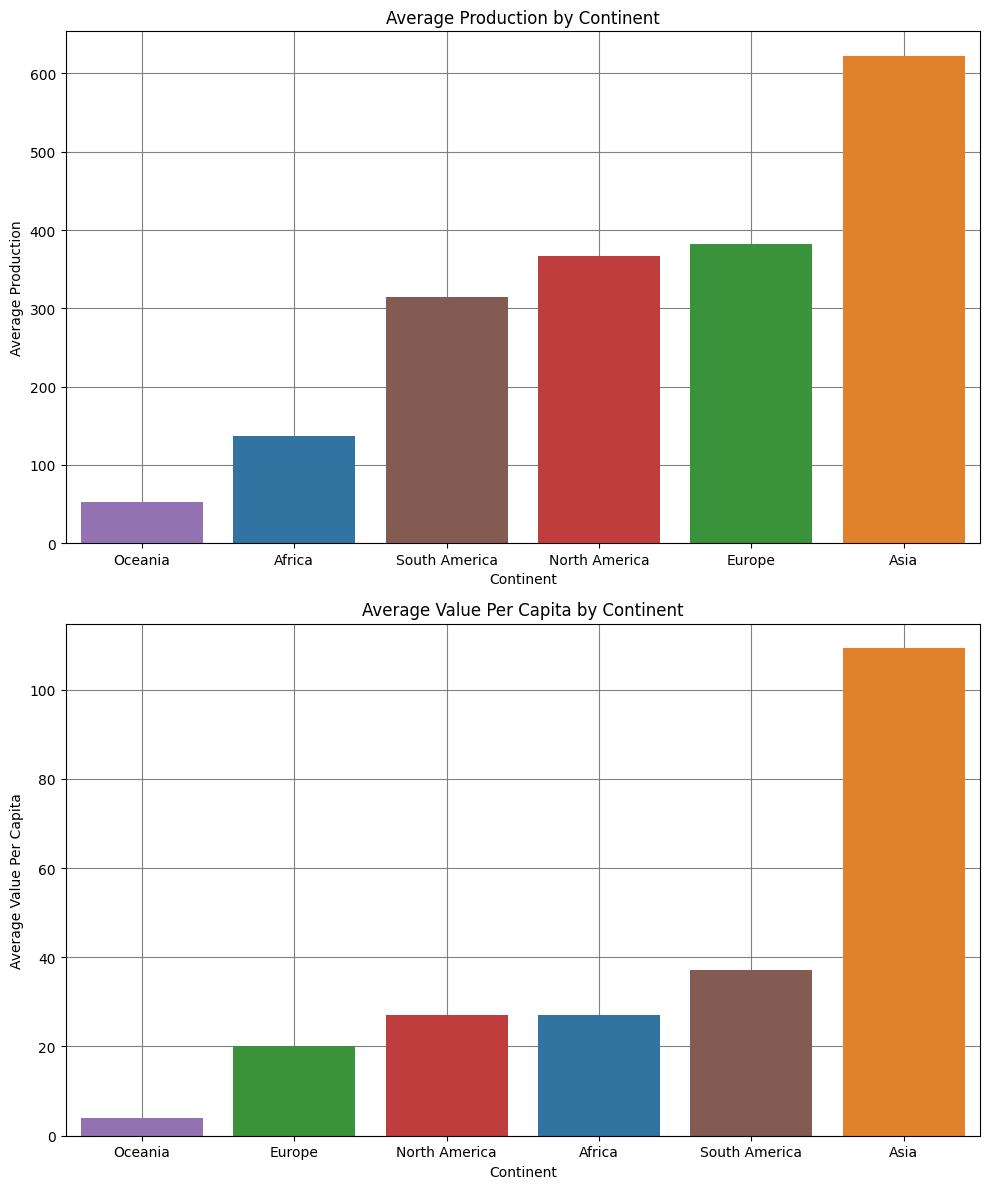

In [120]:
# Calculate the average production
ave_production_continent = merged_df.groupby('continent')['average_production'].mean().sort_values()

# Calculate the average value per capita
vpc_continent = merged_df.groupby('continent')['value_per_capita'].mean().sort_values()

# Palette
col_continent = {
    'Africa': '#1f77b4',            # blue
    'Asia': '#ff7f0e',              # orange
    'Europe': '#2ca02c',            # green
    'North America': '#d62728',     # red
    'Oceania': '#9467bd',           # purple
    'South America': '#8c564b'      # brown
}

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

sns.barplot(
    x=ave_production_continent.index, 
    y=ave_production_continent.values, 
    hue=ave_production_continent.index, 
    palette=col_continent,
    ax=axes[0]
)

axes[0].set_title('Average Production by Continent')
axes[0].set_xlabel('Continent')
axes[0].set_ylabel('Average Production')
axes[0].grid(True, color='gray', zorder=2)
axes[0].set_axisbelow(True)

sns.barplot(
    x=vpc_continent.index, 
    y=vpc_continent.values, 
    hue=vpc_continent.index, 
    palette=col_continent,
    ax=axes[1]
)
axes[1].set_title('Average Value Per Capita by Continent')
axes[1].set_xlabel('Continent')
axes[1].set_ylabel('Average Value Per Capita')
axes[1].grid(True, color='gray', zorder=2)
axes[1].set_axisbelow(True)

plt.tight_layout()
plt.show()

**Insights:**

> Asia leads significantly in average production, more than five times higher than Africa and nearly twice that of Europe.

> Oceania has the lowest production figures, which may reflect smaller agricultural sectors or less intensive farming practices compared to other regions.

> North America and Europe have comparable production levels, suggesting similar capabilities or resources dedicated to agricultural output.

> Asia stands out with a notably higher value per capita compared to other continents, indicating a stronger economic return per person from agriculture.

> In contrast, Oceania exhibits the lowest value, suggesting limited agricultural productivity.

> Europe, North America, and South America show moderate values, with South America slightly higher.


### **Correlation Analysis**


#### Correlation Matrix


In [122]:
# Only include columns that are relevant to correlation matrix
numeric_cols = year_cols + ['value', 'value_per_capita','average_production']

# Create correlation matrix using existing method from Pandas
correlation_matrix = merged_df[numeric_cols].corr()
correlation_matrix

,y1961,y1962,y1963,y1964,y1965,y1966,y1967,y1968,y1969,y1970,y1971,y1972,y1973,y1974,y1975,y1976,y1977,y1978,y1979,y1980,y1981,y1982,y1983,y1984,y1985,y1986,y1987,y1988,y1989,y1990,y1991,y1992,y1993,y1994,y1995,y1996,y1997,y1998,y1999,y2000,y2001,y2002,y2003,y2004,y2005,y2006,y2007,y2008,y2009,y2010,y2011,y2012,y2013,value,value_per_capita,average_production
y1961,1.000000,0.996953,0.991819,0.982617,0.986427,0.982623,0.981941,0.983367,0.984125,0.971267,0.971904,0.969788,0.965995,0.948810,0.951767,0.948360,0.946692,0.945641,0.938790,0.922141,0.926234,0.919876,0.901895,0.902069,0.898378,0.902297,0.901603,0.877996,0.882493,0.891423,0.886957,0.882953,0.868424,0.868348,0.846943,0.842994,0.837243,0.835312,0.825464,0.806910,0.797262,0.778486,0.780499,0.783211,0.773558,0.748388,0.744814,0.726683,0.717692,0.701682,0.689817,0.678682,0.684139,0.214798,0.214798,0.887841
y1962,0.996953,1.000000,0.996036,0.988794,0.991423,0.989008,0.987950,0.989043,0.989106,0.978507,0.978209,0.975131,0.972906,0.959183,0.962277,0.957805,0.957064,0.955960,0.948376,0.935169,0.936979,0.930890,0.914825,0.913413,0.910413,0.911732,0.911627,0.889605,0.893715,0.900342,0.895342,0.890341,0.875133,0.873124,0.852833,0.847451,0.840026,0.838312,0.827274,0.805770,0.795246,0.775849,0.777274,0.779450,0.769491,0.744181,0.739777,0.721495,0.712528,0.696496,0.684632,0.672916,0.677957,0.220389,0.220389,0.890565
y1963,0.991819,0.996036,1.000000,0.997223,0.995657,0.993844,0.993042,0.994558,0.991925,0.984254,0.983963,0.981964,0.978619,0.967759,0.971316,0.969184,0.965907,0.965373,0.961242,0.948206,0.951578,0.945120,0.930415,0.929373,0.927254,0.926688,0.925401,0.904598,0.907974,0.914034,0.907892,0.901639,0.886130,0.882643,0.862569,0.856210,0.847073,0.844745,0.831834,0.806967,0.795269,0.774626,0.775611,0.777161,0.766702,0.742272,0.737603,0.719147,0.710189,0.694271,0.683303,0.671622,0.676580,0.223071,0.223071,0.895783
y1964,0.982617,0.988794,0.997223,1.000000,0.994727,0.992247,0.992647,0.993602,0.989727,0.984811,0.984729,0.984012,0.979481,0.970780,0.975003,0.974360,0.970853,0.970161,0.968651,0.957048,0.961329,0.955131,0.942673,0.941510,0.940145,0.938387,0.936302,0.917282,0.920430,0.924700,0.918397,0.911330,0.894968,0.890499,0.870491,0.863423,0.853356,0.850750,0.836092,0.808016,0.795379,0.773762,0.774378,0.775377,0.764581,0.740976,0.736026,0.717103,0.708294,0.692414,0.681788,0.669820,0.674684,0.226653,0.226653,0.898981
y1965,0.986427,0.991423,0.995657,0.994727,1.000000,0.997595,0.996960,0.996640,0.996408,0.992271,0.993649,0.992194,0.988771,0.976828,0.979773,0.978650,0.976725,0.976856,0.973106,0.961199,0.962771,0.959222,0.943331,0.941875,0.937522,0.936254,0.933948,0.909939,0.913703,0.921660,0.914733,0.907868,0.890784,0.887430,0.865589,0.859015,0.848928,0.846337,0.832062,0.803403,0.791050,0.768969,0.769868,0.771424,0.760267,0.733543,0.728148,0.708937,0.699476,0.682986,0.672057,0.660128,0.665559,0.224395,0.224395,0.895961
y1966,0.982623,0.989008,0.993844,0.992247,0.997595,1.000000,0.998595,0.997968,0.997283,0.995408,0.994224,0.991738,0.992135,0.984107,0.986215,0.983488,0.981503,0.981638,0.976213,0.965225,0.965110,0.960132,0.946263,0.943031,0.936416,0.933276,0.931783,0.909412,0.912129,0.920371,0.913318,0.905594,0.889998,0.884616,0.864953,0.856213,0.845267,0.843308,0.828609,0.799298,0.786504,0.764512,0.764892,0.765978,0.754695,0.727626,0.721852,0.703701,0.694303,0.678566,0.668633,0.657036,0.662202,0.227185,0.227185,0.893899
y1967,0.981941,0.987950,0.993042,0.992647,0.996960,0.998595,1.000000,0.998135,0.997749,0.996461,0.995178,0.993798,0.993942,0.985504,0.988152,0.985692,0.984506,0.984200,0.979382,0.968589,0.968972,0.963748,0.950482,0.947392,0.940320,0.937974,0.936487,0.915035,0.918011,0.925011,0.918854,0.911365,0.895732,0.890489,0.870733,0.862549,0.851437,0.849304,0.834504,0.805005,0.792150,0.769871,0.770206,0.771490,0.760212,0.733263,0.727655,0.709180,0.699767,0.684115,0.674108,0.662273,0.667684,0.227408,0.227408,0.898577
y1968,0.983367,0.989043,0.994558,0.993602,0.996640,0.997968,0.998135,

**Insights:**

> The data accross years, from 1961 to 2013 show a high correlation, often close to 1. It indicates that production values are fairly consistent or stable, which means that agricultural practices remain effective over time.

> The 'value' and and 'value_per_capita' metrics show a lower correlation with the yearly data. It may indicate that in spite of production being stable, the economic value derive does not increase - in direct proportion.


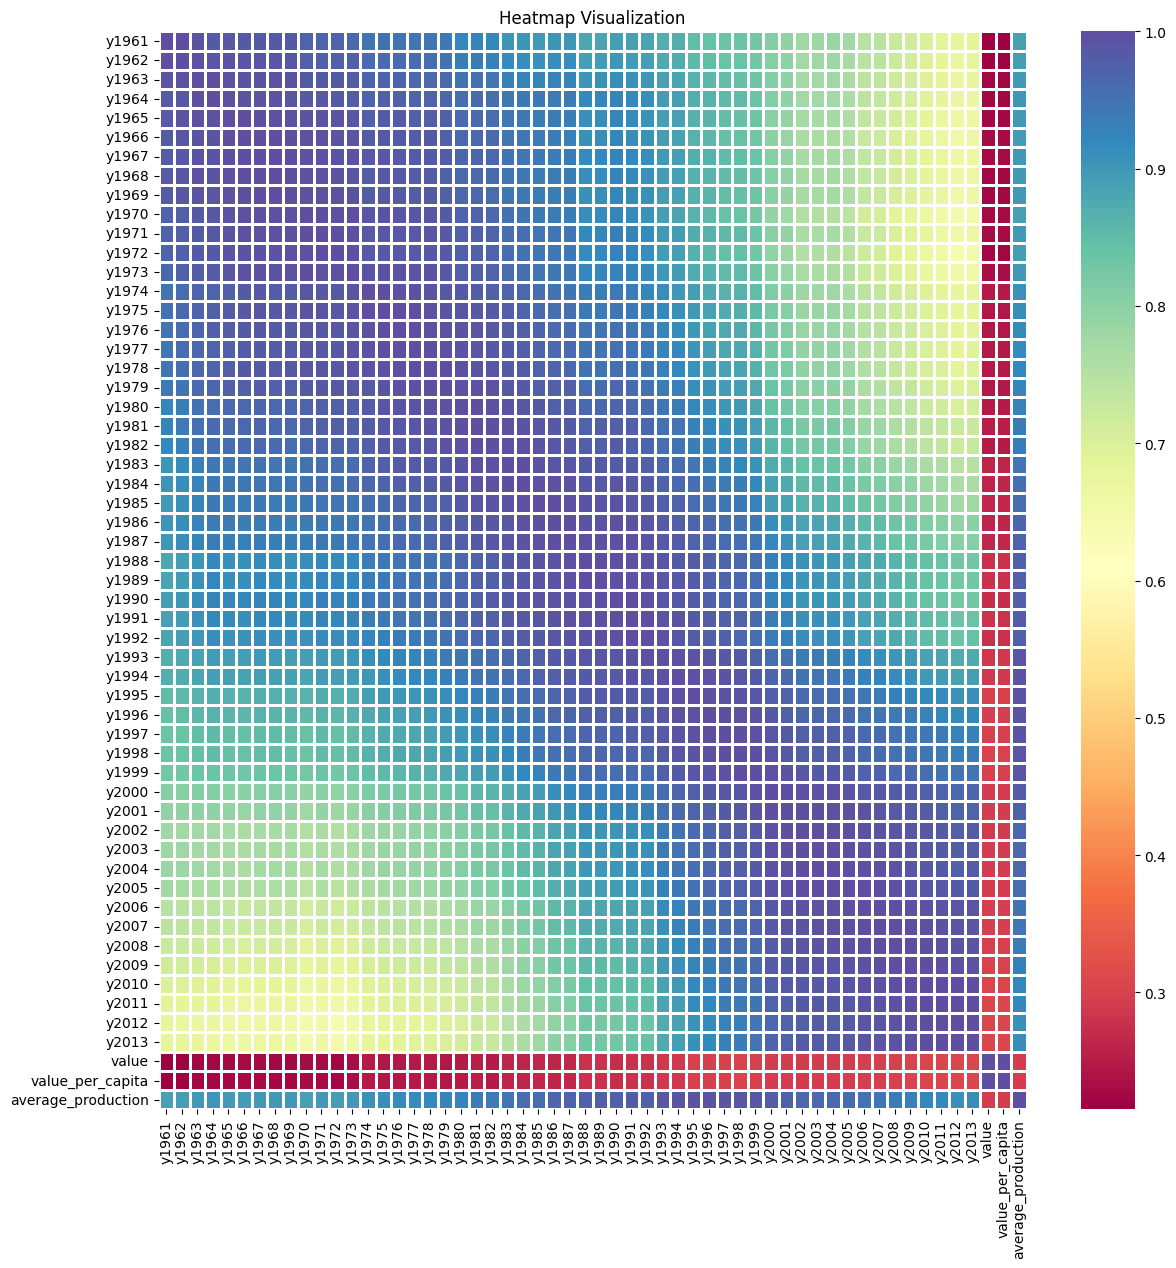

In [123]:
# Generate the heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, cmap='Spectral', linewidths=1)
plt.title('Heatmap Visualization')
plt.show()

**Insights:**

> The heatmap shows that each year is highly correlated with itself (represented by the purple diagonal), there is also a noticeable shift around the mid-1990s. Before this period, the correlations between different years (moving away from the purple diagonal) remain relatively strong.

> However, around y1994, the correlation between different years starts to decrease more rapidly, this is indicated by the quicker transition from purple to green and yellow tones. This suggests that the relationship between years weakens more significantly during the mid-1990s, indicating a change in the data trends.


## `Part 3: Data Visualization`


### **Time-Series Analysis**


#### Line Plot


In [124]:
def line_plot(df, location, top_location, value, top_value, element):
    # Group by specific location (area or continent), calculate their mean and select the top locations with highest mean value
    top_locations = df.groupby(location)[value].mean().nlargest(top_location).index
    
    _, axes = plt.subplots(nrows=len(top_locations), figsize=(10, 15))
    
    for i, loc in enumerate(top_locations):
        # Filter the current location and element and get the top items by average value
        data = df[(df[location] == loc) & (df['element'] == element)]
        top_items = data.groupby('item')[value].mean().nlargest(top_value).index
        
        for item in top_items:
            # Filter the data for current item and calculate the mean across the years
            item_data = data[data['item'] == item][year_cols].mean()
            item_data.index = item_data.index.str[1:].astype(int)  
            
            axes[i].plot(item_data.index, item_data.values, label=item)
        
        axes[i].set_title(f'Top {top_value} {element} Items in {loc}')
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('{value}')
        axes[i].legend(title=f'{element} Items')
        axes[i].grid(True)
      
    plt.tight_layout()  
    plt.show()

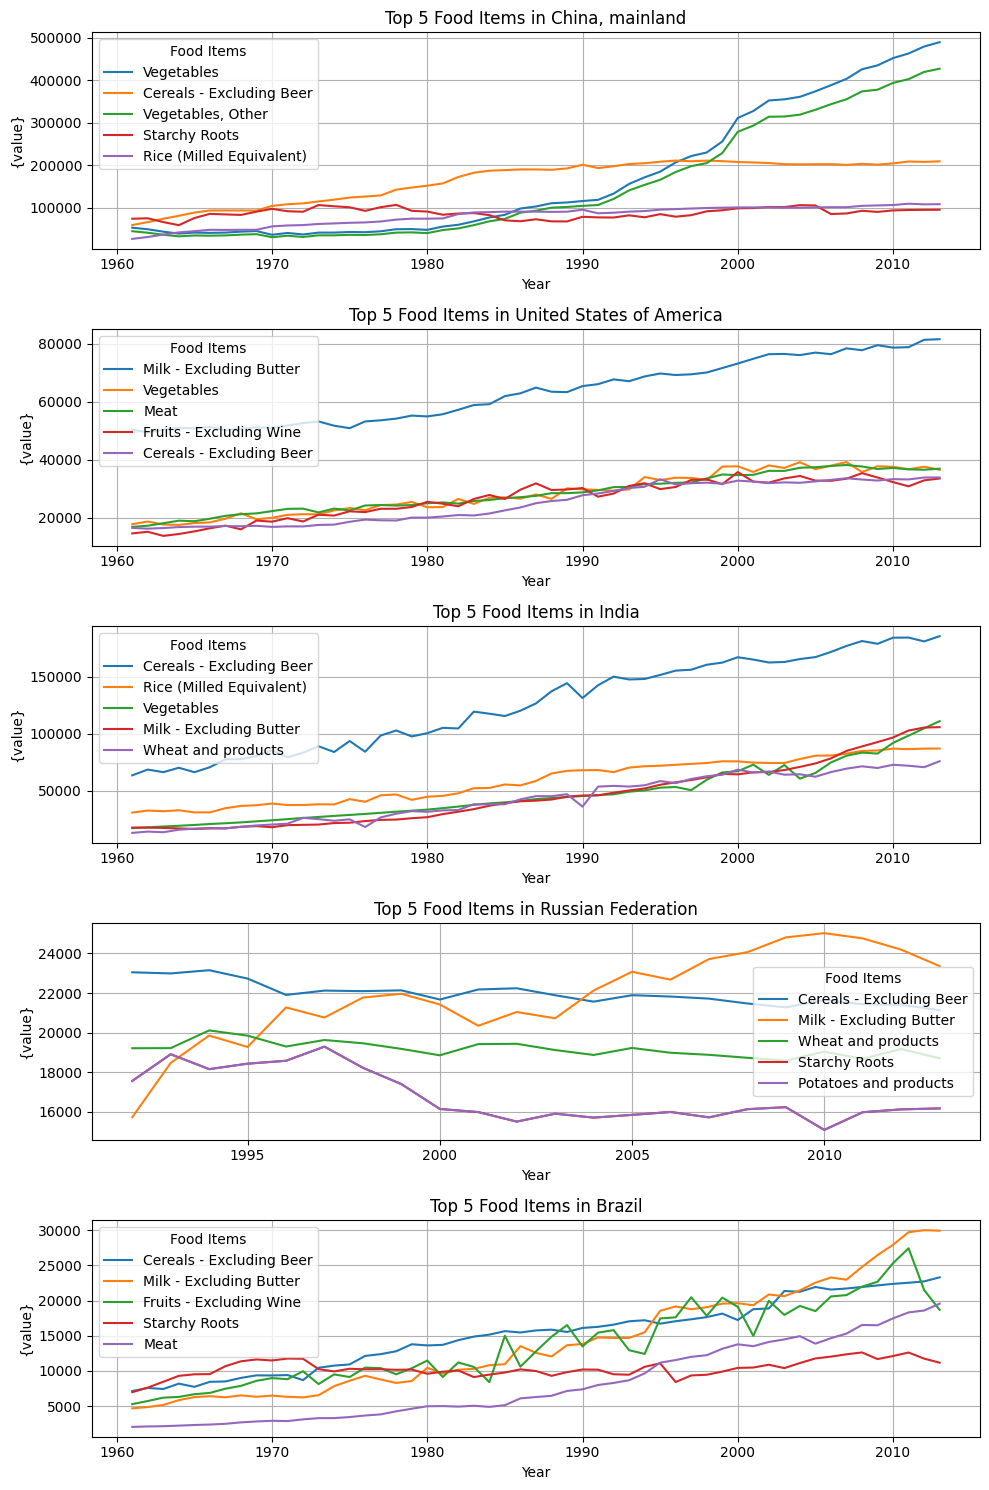

In [125]:
# Line plot for Food items in the top 5 areas in average production
line_plot(
    df=merged_df,
    location='area',
    top_location=5,
    value='average_production',
    top_value=5,
    element='Food'
)

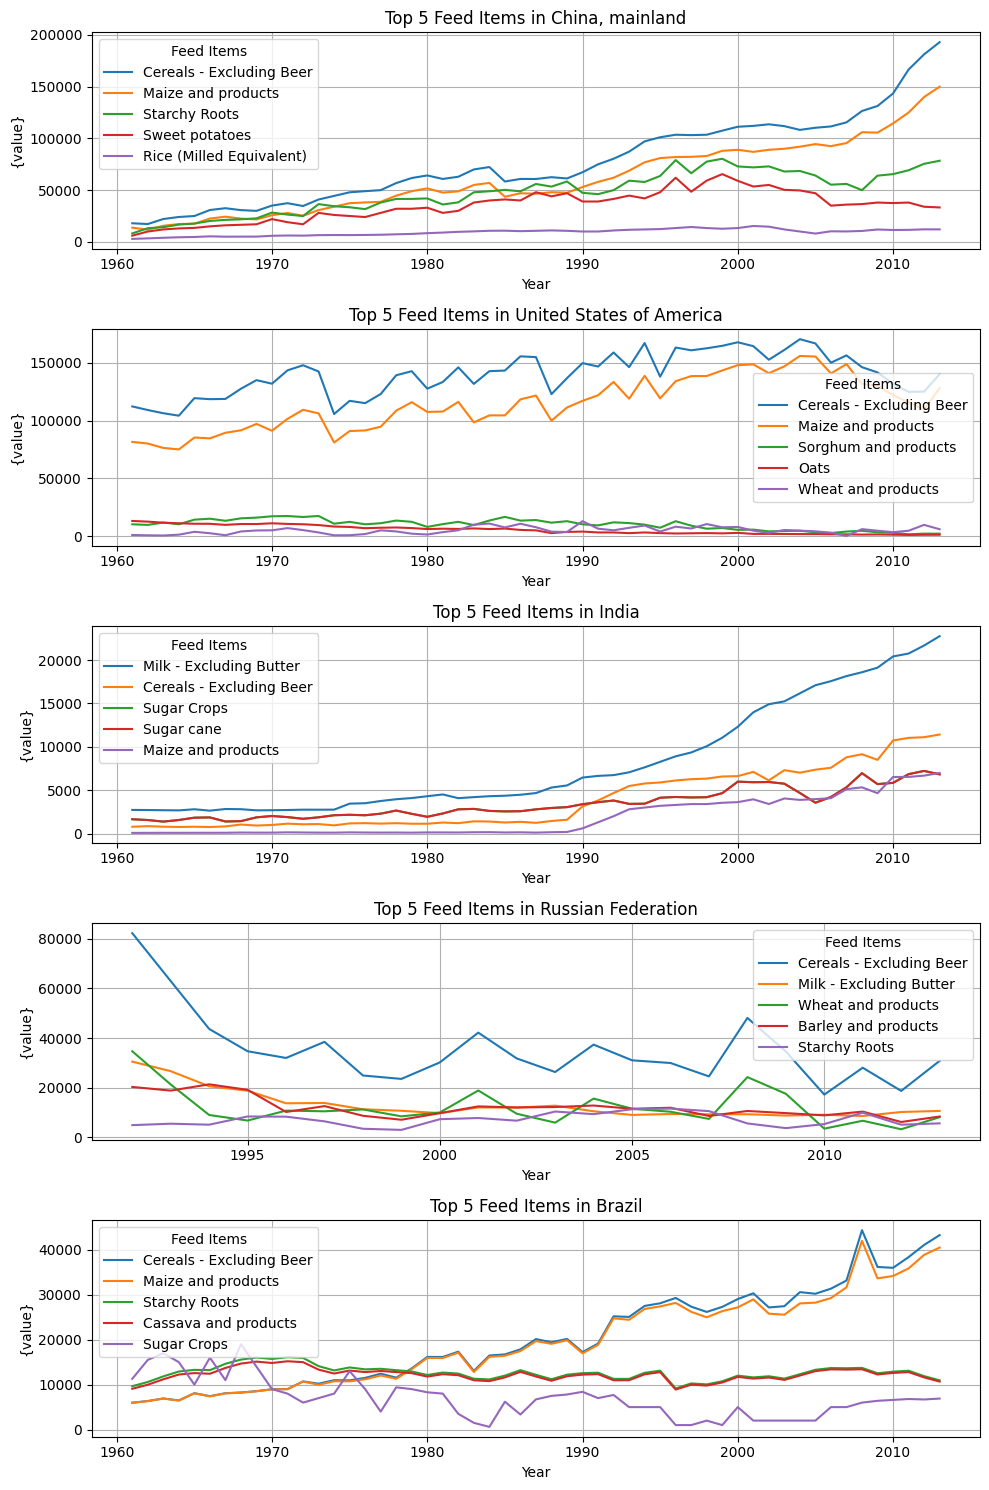

In [126]:
# Line plot for Feed items in the top 5 areas in average production
line_plot(
    df=merged_df,
    location='area',
    top_location=5,
    value='average_production',
    top_value=5,
    element='Feed'
)

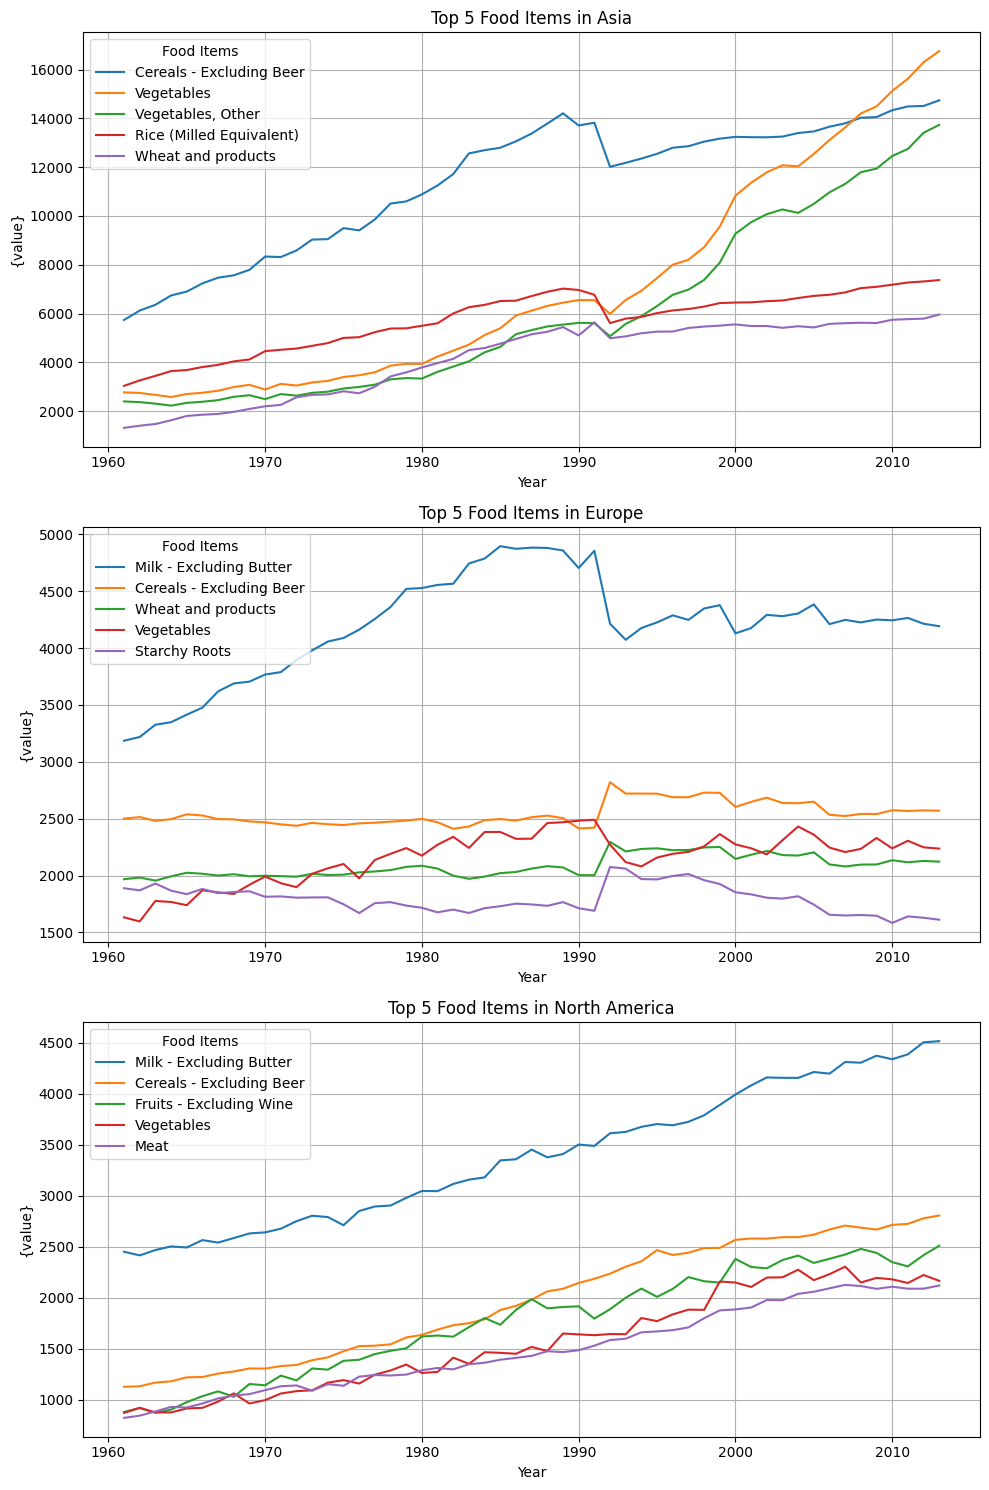

In [128]:
# Line plot for Food items in the top 3 continents in average production
line_plot(
    df=merged_df,
    location='continent',
    top_location=3,
    value='average_production',
    top_value=5,
    element='Food'
)

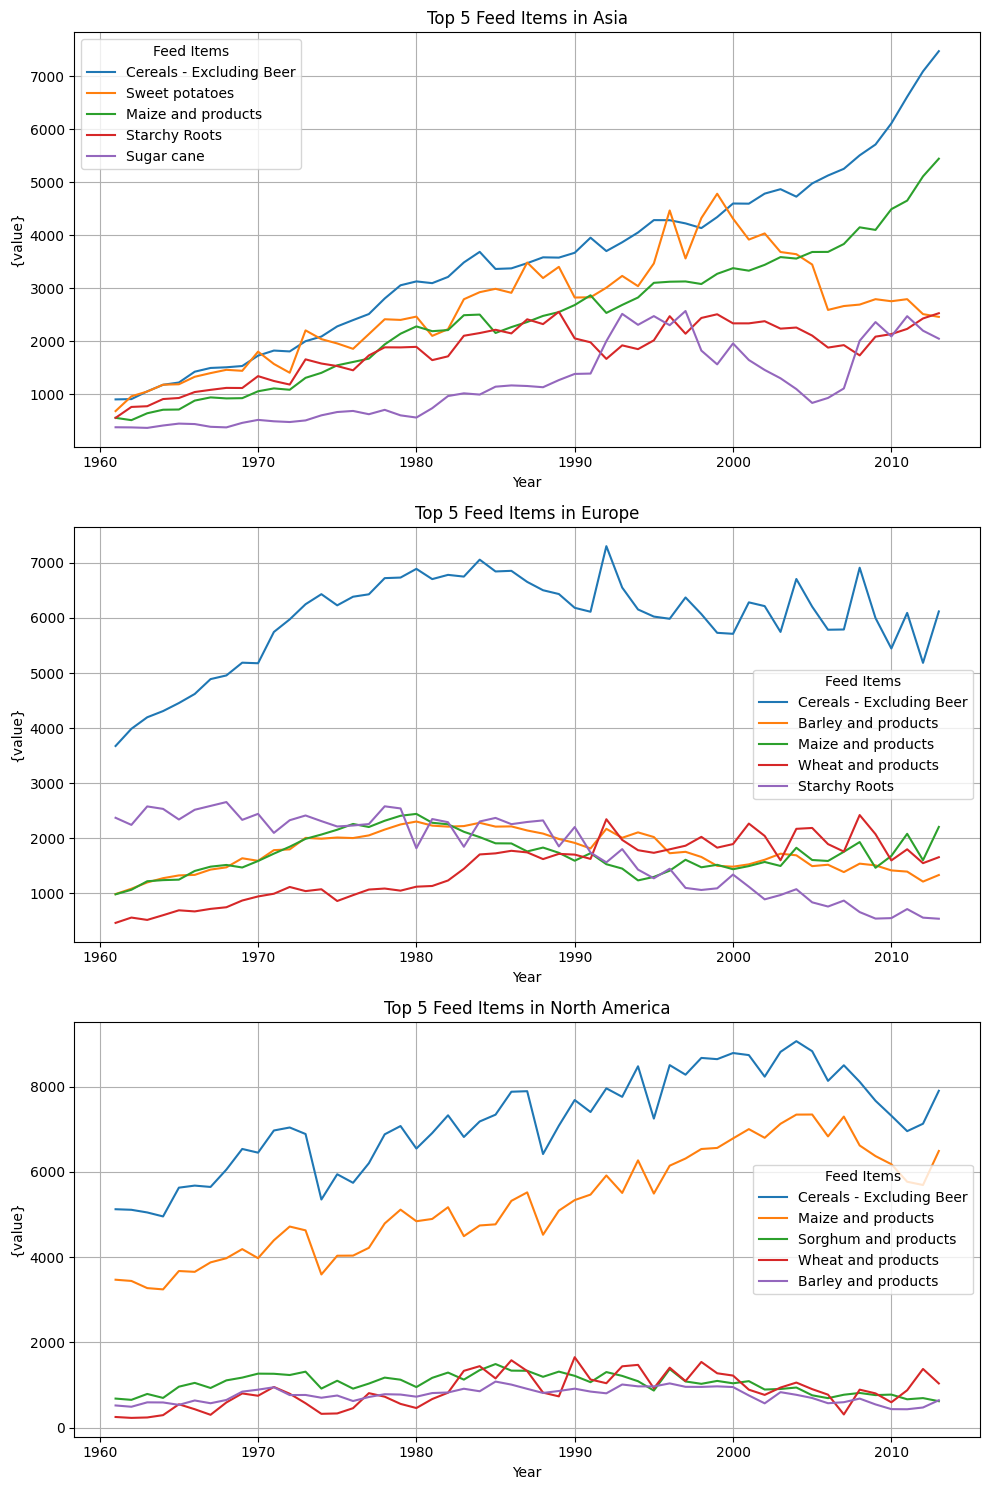

In [129]:
# Line plot for Feed items in the top 3 continents in average production
line_plot(
    df=merged_df,
    location='continent',
    top_location=3,
    value='average_production',
    top_value=5,
    element='Feed'
)

### **Comparison Plot**


#### Plot Creation


In [130]:
def comparison_plot(df, location, top_location, value, top_value, element):
    # Get the top locations by average value
    top_locations = df.groupby(location)[value].mean().nlargest(top_location).index
    
    # Filter by the given element and top locations
    data = df[df[location].isin(top_locations) & (df['element'] == element)]
    
    # Get the top items for each location
    top_items = data.groupby([location, 'item'])[value].mean()
    top_items = top_items.groupby(location).nlargest(top_value).reset_index(level=0, drop=True).reset_index()
    
    # Create subplots
    _, axes = plt.subplots(nrows=len(top_locations), figsize =(10,15))
    cmap = plt.colormaps.get_cmap('viridis')
    
    for i, loc in enumerate(top_locations):
        data = top_items[top_items[location] == loc]
        color_list = cmap(np.linspace(0, 1, top_value))
        
        axes[i].barh(data['item'], data[value], color=color_list)
        axes[i].set_title(f'Top {top_value} {element} Items in {loc}')
        axes[i].set_xlabel(value)
        axes[i].set_ylabel(f'{element} Item')
        axes[i].grid(True)
        
    plt.tight_layout()
    plt.show()

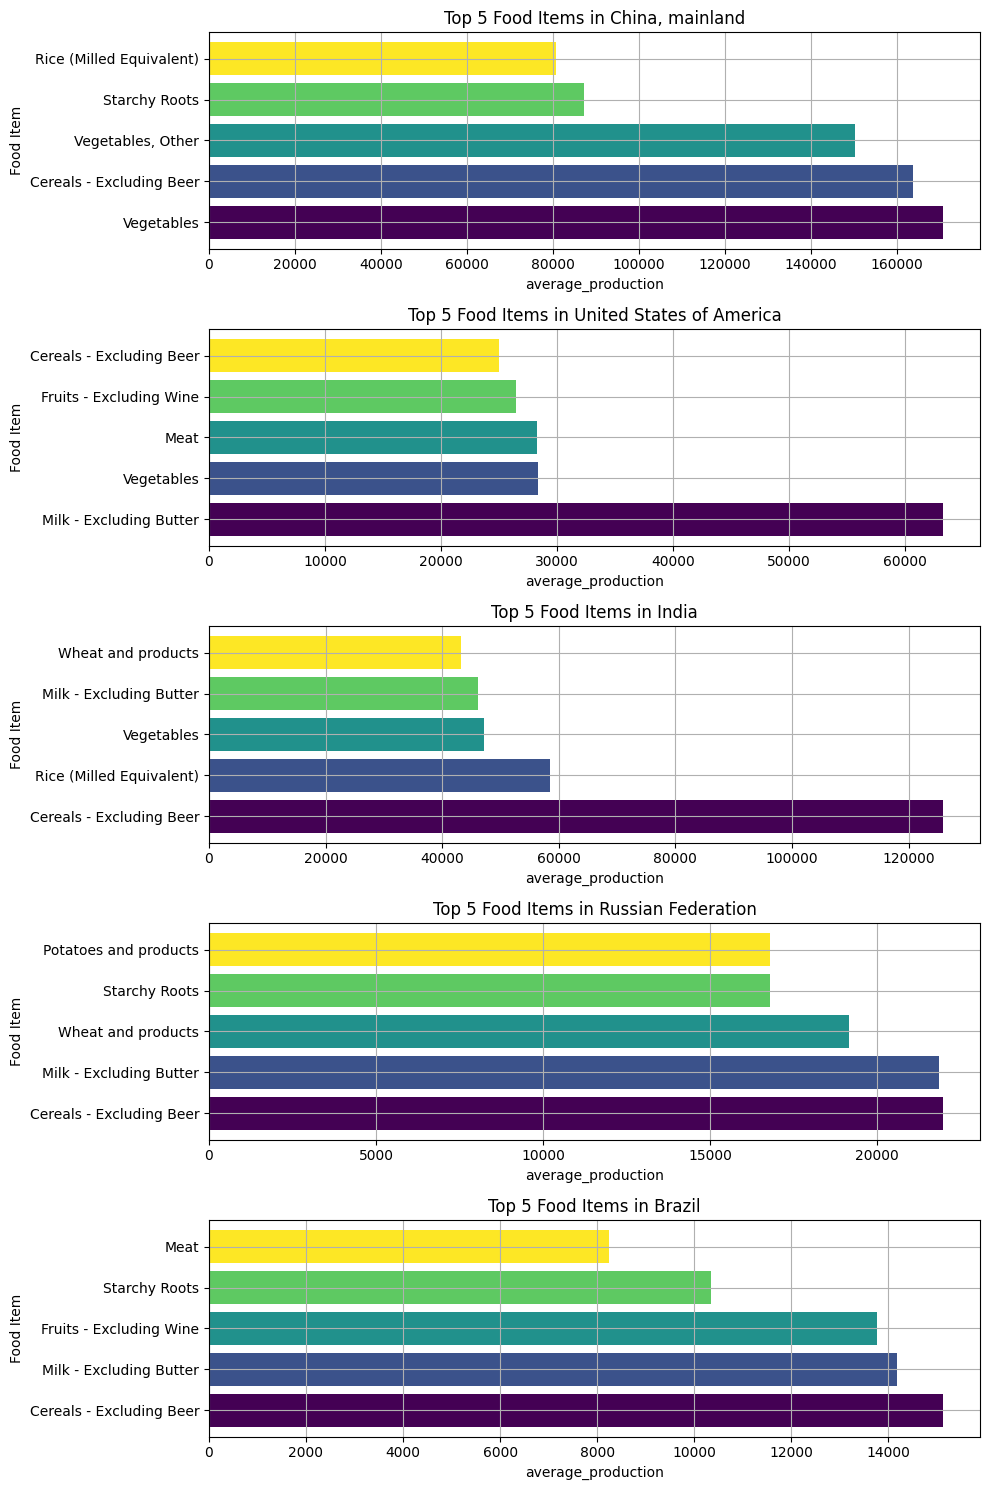

In [131]:
# Comparison plot for Food items in the top 5 areas in average production
comparison_plot(
    df=merged_df,
    location='area',
    top_location=5,
    value='average_production',
    top_value=5,
    element='Food'
)

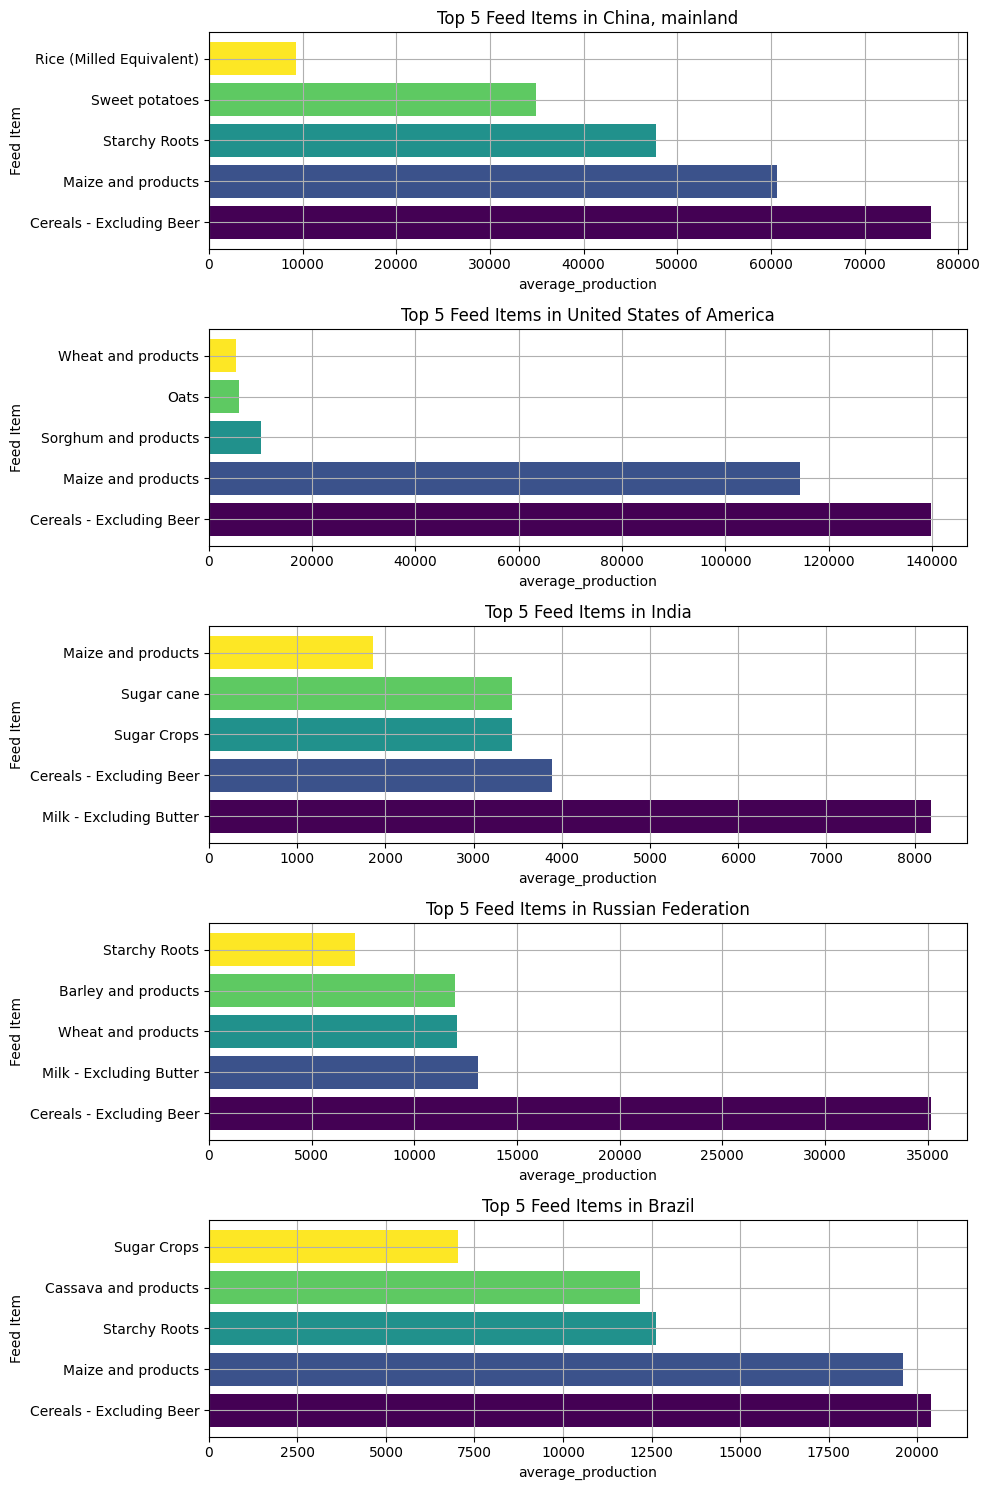

In [133]:
# Comparison plot for Feed items in the top 5 areas in average production
comparison_plot(
    df=merged_df,
    location='area',
    top_location=5,
    value='average_production',
    top_value=5,
    element='Feed'
)

**Insights:**

> These comparison plots illustrate the top 5 food and feed items by average production in the top 5 leading countries: China, United States, India, the Russian Federation, and Brazil. Each bar represents the average production quantity for a specific food or feed item within each country.

`For Food:`

> **China:** The top food items are vegetables, cereals, starchy roots, and rice. This suggests that the Chinese diet mostly relies on staple foods such as grains and vegetables.

> **United States:** Milk, vegetables, meat, cereals, and fruits are the leading food items, indicating a balanced diet with a notable emphasis on dairy and meat products. The U.S.'s strong livestock industry and high demand for dairy and meat explain why these items are so prominent.

> **India:** Their top 5 food items are cereals, rice, vegetables, and wheat, highlighting the central role of grains in the Indian diet. The absence of meat in the top 5 can be attributed to cultural and religious factors, such as Hinduism's promotion of vegetarianism and Islam's dietary restrictions.

> **Russian Federation:** Top 5 food items include cereals, milk, wheat, starchy roots, and potatoes, reflecting a diet heavily reliant on staple crops and dairy. The country's harsh climate influences the production of cold-resistant crops like potatoes and wheat, which are important to the Russian diet.

> **Brazil:** The prominent food items are cereals, milk, fruits, and starchy roots. This diversity underscores Brazil's extensive agricultural resources and favorable tropical and subtropical climates, which support a wide range of crops.

`For Feed:`

> **China and United States:** Both countries are top producers of maize and cereals for animal feed, highlighting how crucial these grains are for their large livestock industries, which are essential for meeting high domestic demand for meat and dairy products.

> **India:** Maize and cereals are also prominent in feed production, supporting the large livestock sector, which plays a crucial role in the rural economy. Using grain-based feed helps maintain a big livestock population, especially in a country where milk and dairy products are highly valued

> **Russian Federation:** he focus on wheat, barley, and cereals for feed emphasizes the use of grain-based feed for animals. This is essential in a country with long, cold winters, where livestock needs substantial feed supplies to survive the harsh conditions.

> **Brazil:** Large production of maize, cereals, and starchy roots supports its large agricultural sector geared toward livestock. As one of the world's top meat exporters, especially beef, Brazil has a high demand for feed to support its extensive livestock industry.

`Conclusion`

> The data shows how cultural, religious, and climatic factors affect the types of food and feed produced in each country. For example, India’s cultural preferences result in a diet rich in grains with less focus on meat, while Russia’s climate requires the cultivation of hardy crops. In the U.S. and Brazil, strong livestock industries lead to high production of feed, especially maize and cereals. These factors influence each country’s agricultural practices and food security, highlighting the link between culture, climate, and agriculture.


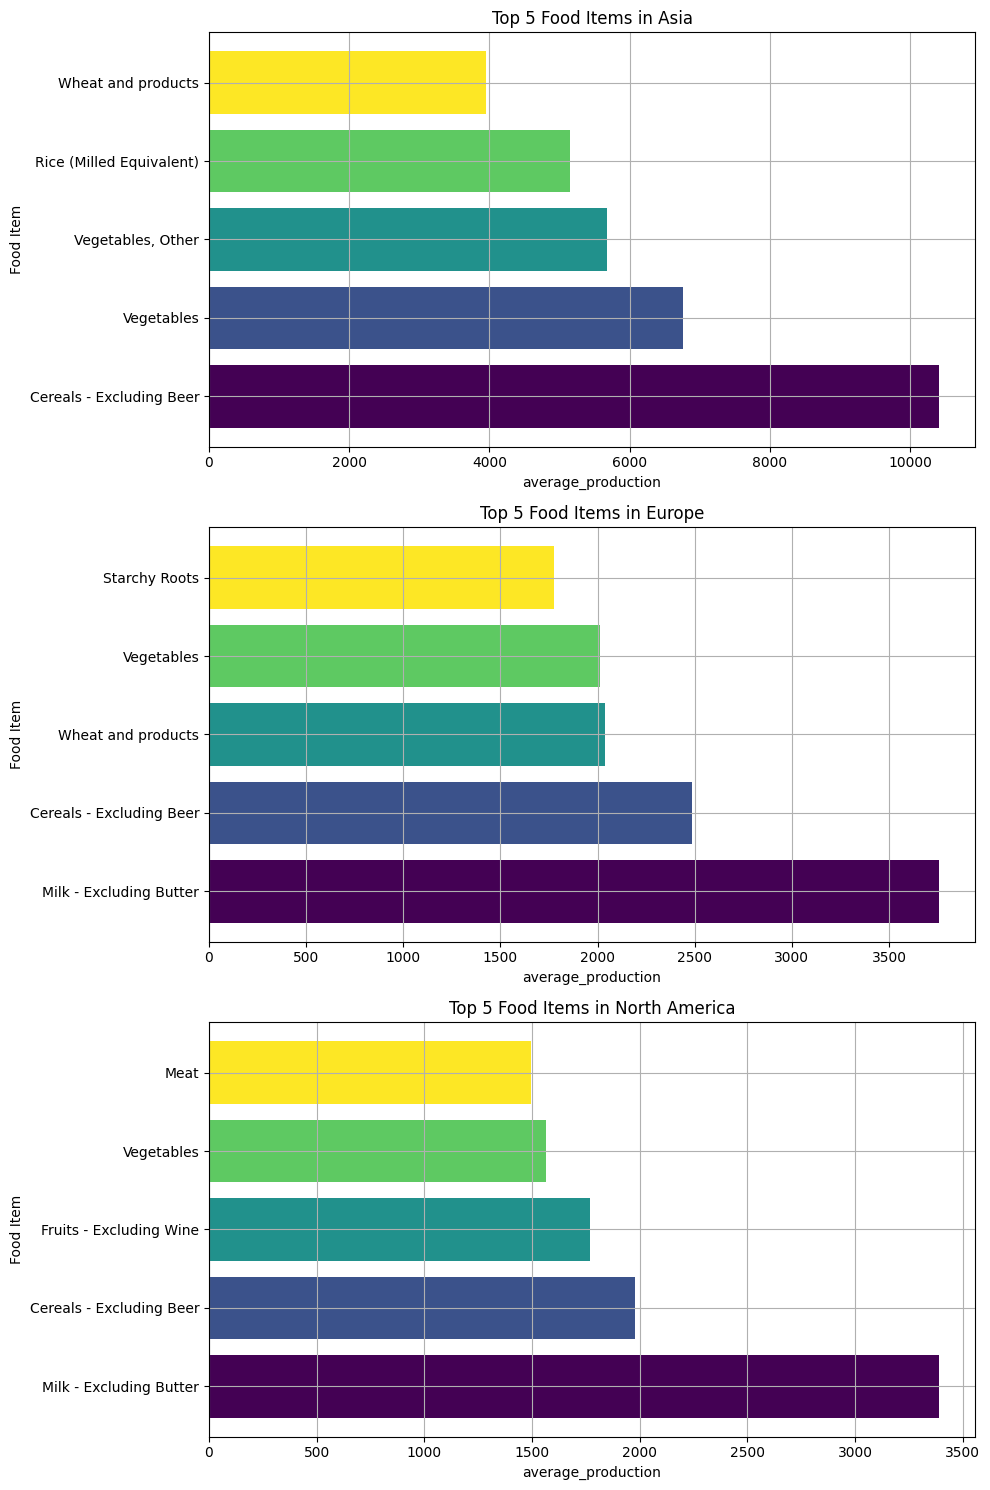

In [135]:
# Comparison plot for Food items in the top 3 continents in average production
comparison_plot(
    df=merged_df,
    location='continent',
    top_location=3,
    value='average_production',
    top_value=5,
    element='Food'
)

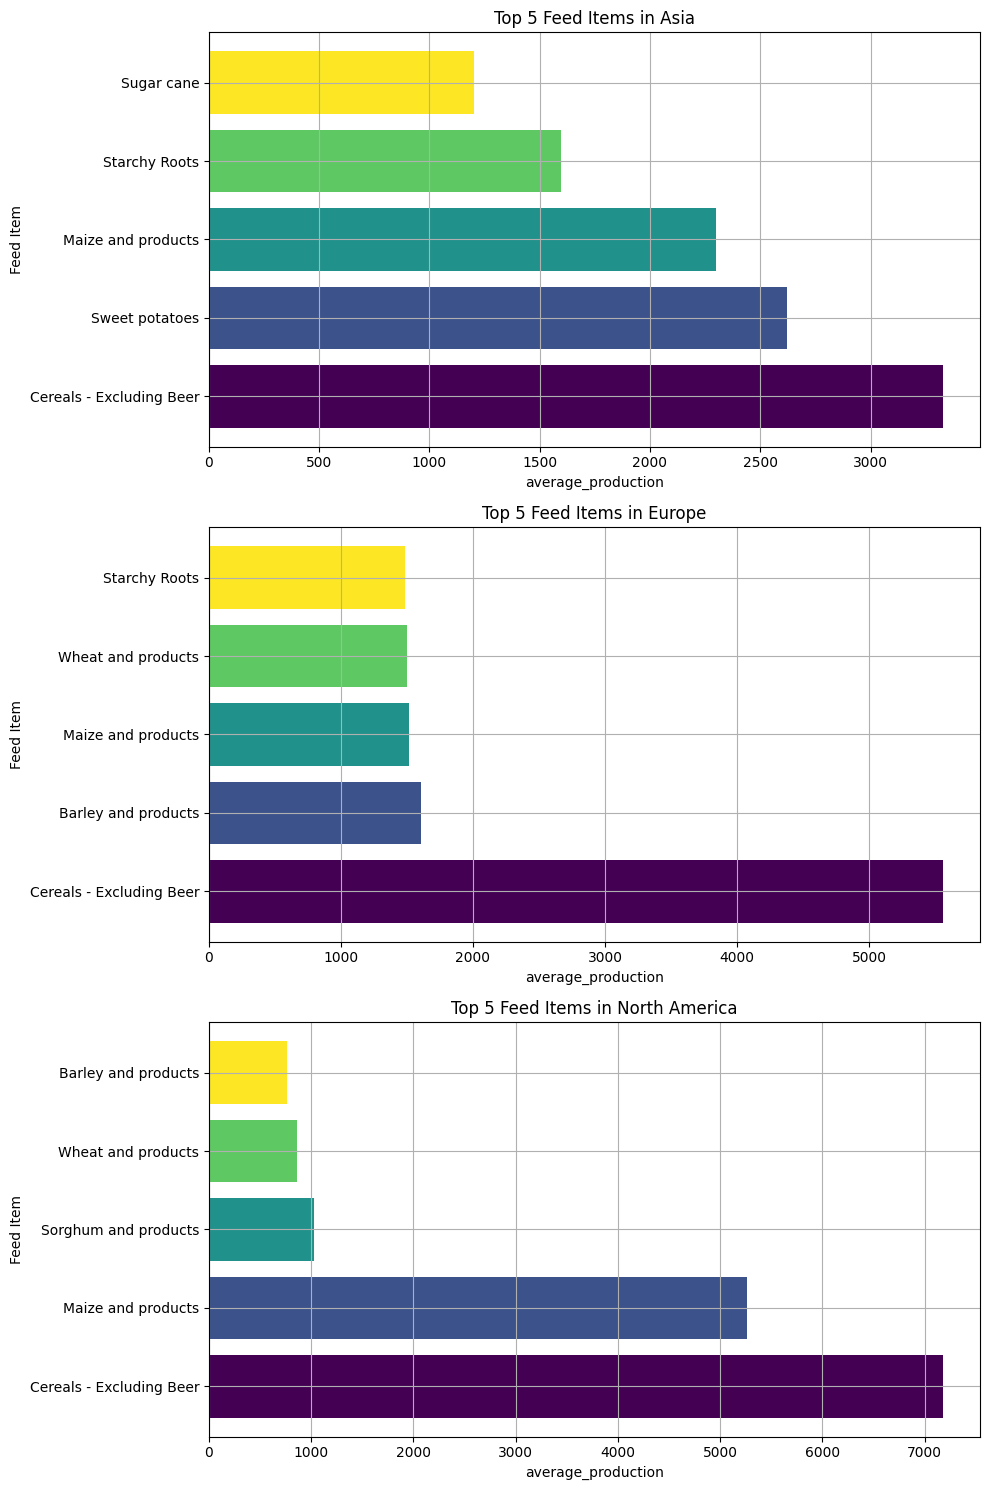

In [136]:
# Comparison plot for Feed items in the top 3 continents in average production
comparison_plot(
    df=merged_df,
    location='continent',
    top_location=3,
    value='average_production',
    top_value=5,
    element='Feed'
)

**Insights:**

> These comparison plots illustrate the top 5 food and feed items by average production in the top 3 leading continents: Asia, Europe, and North America. Each bar represents the average production quantity for a specific food or feed item within each continent.

`For Food:`

> **Asia:** Asia's leading role in cereal production, especially rice and wheat, may be likely due to its large population and reliance on staple foods essential to traditional diets. Countries like China and India use extensive agricultural land for growing cereals to meet the needs of its large population. Furthermore, rice is a central part of cultural practices and cuisines in many Asian countries. This also applies in the high production of vegetables wherein, it is incorporated into a variety of dishes.

> **Europe:** In Europe, dairy industries helps produce a lot of milk, especially in Germany, France, and the Netherlands. The mild weather in Europe is good for growing cereals and wheat, which are important for foods like bread and pasta. Europe’s different climates and fertile soil also support growing various vegetables and starchy foods like potatoes, which are key parts of many European meals.

> **North America:** North America has a strong dairy industry, with the U.S. being in the top 10 largest milk producing countries. The vast agricultural lands in the U.S. and Canada support large-scale cereal production, including maize, wheat, and barley, which are used for food and livestock feed. The diverse climates in North America also allow for growing a wide range of fruits and vegetables. Additionally, large-scale livestock farming in North America, especially for beef, pork, and poultry, makes meat an important part of the diet in the U.S. and Canada.

`For Feed:`

> **Asia:** In Asia, cereals like rice and wheat as the leading feed items likely reflects the continent's agricultural focus and dietary habits. Starchy roots, such as cassava and sweet potatoes, also play a significant role, possibly due to their versatility and ability to thrive in tropical climates.

> **Europe:** In Europe, wheat and barley are the main feed components, showing the continent's agricultural methods and food preferences. Although starchy roots are present, they are less significant compared to Asia, possibly due to varying climate conditions or economic factors.

> **North America:** In North America, especially in the U.S., a lot of cereal crops are grown for animal feed, supporting the livestock industry. Maize is a key feed crop, important for both meat and dairy. Sorghum is used as a drought-resistant feed in drier areas. While, wheat is used for feed in Canada and the northern U.S., and barley is important for feeding cattle in the northern plains.

`Conclusion`

> The data reveals how cultural, climatic, and economic factors shape food and feed production across Asia, Europe, and North America. Asia’s prominence on rice and wheat reflects its population size and dietary habits, while starchy roots thrive in its tropical climates. Europe’s varied climates support its strong dairy and cereal industries, with potatoes and vegetables also being significant. In North America, extensive agricultural lands and diverse climates enable large-scale cereal production for both food and feed, including key crops like maize and sorghum. These patterns illustrate how regional factors influence agricultural practices and food systems.


### **Geographical Visualization**


#### Choropleth Map


In [137]:
# Get the mean of the important columns that will be used in choropleth map
avg_data_per_country = merged_df.groupby(['iso_alpha3', 'area'], as_index=False).agg({
    'value_per_capita': 'mean',
    'average_production': 'mean'
})

avg_data_per_country

,iso_alpha3,area,value_per_capita,average_production
0,AFG,Afghanistan,35.530081,156.663333
1,AGO,Angola,29.784193,122.211528
2,ALB,Albania,2.930187,36.386256
3,ARE,United Arab Emirates,9.400145,34.384687
4,ARG,Argentina,44.271041,503.171192
...,...,...,...,...
167,WSM,Samoa,0.196440,2.329665
168,YEM,Yemen,28.250420,72.900745
169,ZAF,South Africa,56.717156,329.053100
170,ZMB,Zambia,17.094130,49.636321


In [138]:
fig = px.choropleth(
    avg_data_per_country,
    locations='iso_alpha3',  
    color='value_per_capita', 
    hover_name='area', 
    color_continuous_scale=px.colors.sequential.Plasma,  
    projection='equirectangular', 
    title='Value per Capita by Country'
)

fig.show()

In [139]:
fig = px.choropleth(
    avg_data_per_country,
    locations='iso_alpha3',  
    color='average_production', 
    hover_name='area', 
    color_continuous_scale=px.colors.sequential.Plasma,  
    projection='equirectangular', 
    title='Average Production by Country'
)

fig.show()